# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [203]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [204]:
# your code here
employees = pd.read_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 4/Day 19 - Thursday/[LAB 5] - Pivot Tables and Crosstabs/Employee.csv")
employees.head(2)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [205]:
# Method 1
# your code here
employees.groupby("Department", as_index=False)[["Salary"]].mean()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [206]:
# Method 2
# your code here
employees[["Department", "Salary"]].pivot_table(index="Department", values="Salary", aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [207]:
# your code here
employees[["Department", "Title", "Salary"]].pivot_table(index="Department", columns="Title", values="Salary", margins=True, margins_name="totalMean", aggfunc=np.mean, fill_value="missing", sort=True)

Title,VP,analyst,associate,totalMean
Department,,,,
HR,70.0,32.5,missing,45.0
IT,70.0,32.5,60.0,48.75
Sales,missing,missing,55.0,55.0
totalMean,70.0,32.5,56.666667,48.888889


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [208]:
employees.describe(include=object)

,Name,Department,Education,Gender,Title
count,9,9,9,9,9
unique,9,3,3,2,3
top,Jose,IT,Master,M,analyst
freq,1,4,5,5,4


In [209]:
# your code here
employees[["Title", "Years", "Salary"]].pivot_table(index="Title", columns="Years", values="Salary", margins=True, margins_name ="totalMean", fill_value="missing")

Years,1,2,3,4,7,8,totalMean
Title,,,,,,,
VP,missing,missing,missing,missing,missing,70.0,70.0
analyst,35.0,30.0,missing,35.0,missing,missing,32.5
associate,missing,55.0,55.0,missing,60.0,missing,56.666667
totalMean,35.0,38.333333,55.0,35.0,60.0,70.0,48.888889


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [210]:
# your code here
employees[["Department", "Title", "Salary"]].pivot_table(index="Department", columns="Title", values="Salary", aggfunc=[len, np.mean], margins=True, margins_name="Total", fill_value="missing")

len                              mean                      \
Title            VP  analyst associate Total       VP  analyst  associate   
Department                                                                  
HR              1.0      2.0   missing     3     70.0     32.5    missing   
IT              1.0      2.0       1.0     4     70.0     32.5       60.0   
Sales       missing  missing       2.0     2  missing  missing       55.0   
Total             2        4         3     9     70.0     32.5  56.666667   

                       
Title           Total  
Department             
HR               45.0  
IT              48.75  
Sales            55.0  
Total       48.888889

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [211]:
# your code here

# method 1
employees.groupby(["Department", "Title"])[["Salary"]].agg(["median", "min", "max", "std"])

Salary                  
                     median min max       std
Department Title                             
HR         VP          70.0  70  70       NaN
           analyst     32.5  30  35  3.535534
IT         VP          70.0  70  70       NaN
           analyst     32.5  30  35  3.535534
           associate   60.0  60  60       NaN
Sales      associate   55.0  55  55  0.000000

In [212]:
# method 2
empAnalysis = employees[["Department", "Title", "Salary"]].pivot_table(index=["Department", "Title"], values="Salary", aggfunc=[np.median, np.min, np.max, np.std], fill_value="missing")
empAnalysis

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [213]:
"""
your commments here
"""
print("""

- VP title tends to have the highest salary from any department
- Analyst earns about half of the VP and as the lowest salary of all (where salary varies 3.5std +/- from the mean)
- Associates in IT gains a bit more than the associates from the Sales department
- All titles, besides analyst, have a fixed salary (same value for median, min and max with STD of NaN, indicating that there's likely only one data point for this role)
- STD for associate in Sales is 0, indicating that there's no variation in salary for this position,
but unlike the VP and IT associate roles (having NaN for STD), it suggests there might be more than one data point with the same salary value

""")



- VP title tends to have the highest salary from any department
- Analyst earns about half of the VP and as the lowest salary of all (where salary varies 3.5std +/- from the mean)
- Associates in IT gains a bit more than the associates from the Sales department
- All titles, besides analyst, have a fixed salary (same value for median, min and max with STD of NaN, indicating that there's likely only one data point for this role)
- STD for associate in Sales is 0, indicating that there's no variation in salary for this position,
but unlike the VP and IT associate roles (having NaN for STD), it suggests there might be more than one data point with the same salary value




#### Based on your comments, fill the missing values with an appropriate value.

In [214]:
# your code here
empAnalysis.fillna(0, inplace=True)
empAnalysis

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [215]:
employees.head(1)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35


In [216]:
# your code here

# method 1
employees.groupby("Department")[["Salary"]].agg(["count", "sum"])

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

In [217]:
# method 2
employees[["Department", "Salary"]].pivot_table(index="Department", values="Salary", aggfunc=[len,np.sum])

,len,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [218]:
# your code here
employees.groupby(["Department", "Title"]).agg({"Years":"sum", "Salary":"mean"})

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [219]:
# your code here
def mean_wo_max(data):
    return data[data["Salary"] != data["Salary"].max()][["Salary"]].mean()

employees.groupby("Department", as_index=False).apply(mean_wo_max)

,Department,Salary
0,HR,32.500000
1,IT,41.666667
2,Sales,NaN


In [220]:
employees[employees["Salary"] != employees["Salary"].max()][["Salary"]].mean()

Salary    42.857143
dtype: float64

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [221]:
# your code here
fitbit = pd.read_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 4/Day 19 - Thursday/[LAB 5] - Pivot Tables and Crosstabs/Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [222]:
# your code here
display(fitbit.info())
display(fitbit.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

None

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
unique,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,05-02-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,NaN,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,NaN,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,NaN,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,NaN,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [223]:
# your code here

# method 1
correlation_coefficient, p_value = pearsonr(fitbit["Minutes Very Active"], fitbit["Steps"])

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation coefficient: 0.5714518481062606
P-value: 3.357282499453276e-33


In [224]:
# method 2
mva = fitbit["Minutes Very Active"]
steps = fitbit["Steps"]

steps.corr(mva)

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

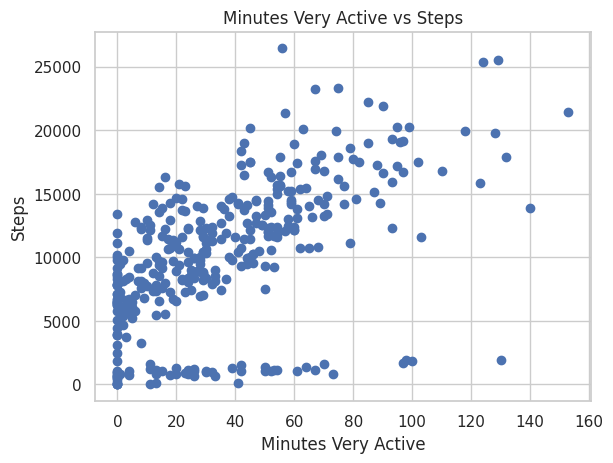

In [225]:
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Minutes Very Active vs Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [226]:
"""
your commments here
"""

print("""


Based on the provided correlation coefficient (0.571) and p-value (3.357e-33),
we can conclude that there is a statistically significant, moderate positive correlation
between Minutes Very Active and Steps.

This suggests that as the number of Minutes Very Active increases,
the number of Steps taken also tends to increase.
Although the relationship is not extremely strong,
the very low p-value indicates that it is highly unlikely that this correlation is due to chance alone.

In other words,
the data supports the idea that engaging in more minutes of very active exercise is
generally associated with taking more steps.

""")


print("""

The correlation coefficient (r) and p-value are both important statistics when assessing the relationship between two variables.
In this case, the correlation coefficient is approximately 0.571,
which suggests a moderate positive relationship between the two variables.

This means that as one variable increases, the other variable tends to increase as well,
though not as strongly as in the case of a perfect positive correlation (r = 1).

The p-value, which is 3.357e-33, is extremely small and close to zero.
In most cases, a p-value threshold of 0.05 is used to determine whether a correlation is statistically significant.
Since the p-value here is far below this threshold,
we can conclude that the correlation between the two variables is statistically significant,
meaning that it is very unlikely that the observed relationship is due to chance alone.

In summary,
the provided information suggests that there is a statistically significant, moderate positive correlation between the two variables.

""")




Based on the provided correlation coefficient (0.571) and p-value (3.357e-33),
we can conclude that there is a statistically significant, moderate positive correlation
between Minutes Very Active and Steps.

This suggests that as the number of Minutes Very Active increases,
the number of Steps taken also tends to increase.
Although the relationship is not extremely strong,
the very low p-value indicates that it is highly unlikely that this correlation is due to chance alone.

In other words,
the data supports the idea that engaging in more minutes of very active exercise is
generally associated with taking more steps.




The correlation coefficient (r) and p-value are both important statistics when assessing the relationship between two variables.
In this case, the correlation coefficient is approximately 0.571,
which suggests a moderate positive relationship between the two variables.

This means that as one variable increases, the other variable tends to increase as well,
though 

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [227]:
# your code here

# method 1
r, p = pearsonr(fitbit["Minutes Sedentary"], fitbit["Steps"])

print("Correlation coefficient:", r)
print("P-value:", p)

Correlation coefficient: 0.0769060806299009
P-value: 0.14143690593734595


In [228]:
# method 2
ms = fitbit["Minutes Sedentary"]
steps = fitbit["Steps"]

steps.corr(ms)

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

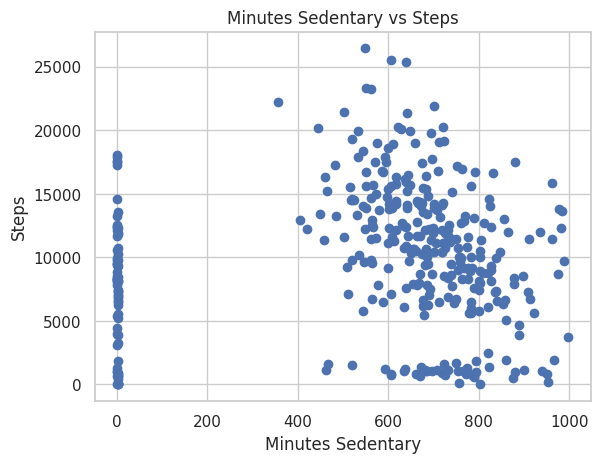

In [229]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Minutes Sedentary vs Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [230]:
"""
your commments here
"""

print("""

Based on the provided correlation coefficient (0.0769) and p-value (0.1414) for the relationship between Minutes Sedentary and Steps,
we can conclude that there is a weak positive correlation between the two variables.
This suggests that as the number of Minutes Sedentary increases,
the number of Steps taken also tends to slightly increase, but this relationship is not very strong.

Furthermore, the p-value (0.1414) is greater than the common significance threshold of 0.05.
This indicates that the observed correlation is not statistically significant,
meaning that we cannot confidently assert that the weak positive relationship between Minutes Sedentary and Steps is not due to chance alone.

In summary, based on the correlation coefficient and p-value,
there is a weak positive relationship between Minutes Sedentary and Steps,
but this relationship is not statistically significant.
This means that we cannot confidently conclude that there is a meaningful linear relationship between the two variables,
and the observed correlation could be due to chance.

""")



Based on the provided correlation coefficient (0.0769) and p-value (0.1414) for the relationship between Minutes Sedentary and Steps,
we can conclude that there is a weak positive correlation between the two variables.
This suggests that as the number of Minutes Sedentary increases,
the number of Steps taken also tends to slightly increase, but this relationship is not very strong.

Furthermore, the p-value (0.1414) is greater than the common significance threshold of 0.05.
This indicates that the observed correlation is not statistically significant,
meaning that we cannot confidently assert that the weak positive relationship between Minutes Sedentary and Steps is not due to chance alone.

In summary, based on the correlation coefficient and p-value,
there is a weak positive relationship between Minutes Sedentary and Steps,
but this relationship is not statistically significant.
This means that we cannot confidently conclude that there is a meaningful linear relationship between th

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [231]:
# your code here

# method 1
r, p = pearsonr(fitbit["MinutesOfSleep"], fitbit["Steps"])

print("Correlation coefficient:", r)
print("P-value:", p)

Correlation coefficient: 0.13098565950836383
P-value: 0.012018728392518154


In [232]:
# method 2
mos = fitbit["MinutesOfSleep"]
steps = fitbit["Steps"]

steps.corr(mos)

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

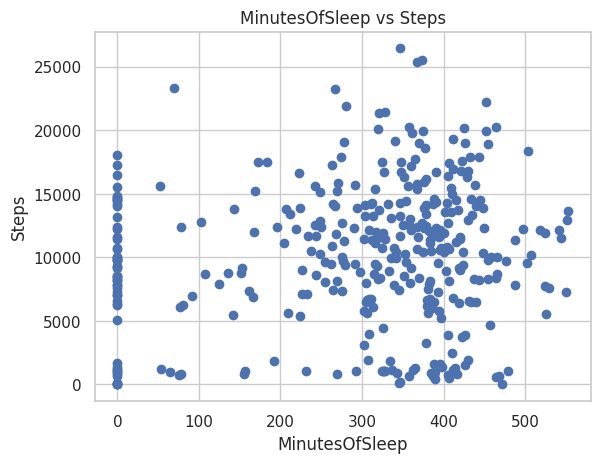

In [233]:
# your code here
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("MinutesOfSleep vs Steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

In [234]:
"""
your commments here
"""

print("""

Based on the computed correlation coefficient (r) of 0.13098565950836383,
there is a weak positive relationship between the two variables, Minutes of Sleep and Steps.
This means that as the number of minutes of sleep increases,
the number of steps taken also tends to increase slightly.
However, the strength of this relationship is quite weak,
so it is not a strong predictor of the relationship between the two variables.

The P-value of 0.012018728392518154 is less than the typical significance level of 0.05,
which indicates that the correlation is statistically significant.
This means that the weak positive relationship between the two variables is unlikely to have occurred by chance,
and there may be some underlying association between minutes of sleep and steps.
However, it's important to remember that correlation does not imply causation,
and further research would be needed to determine if there is any direct causal relationship between these two variables.

""")



Based on the computed correlation coefficient (r) of 0.13098565950836383,
there is a weak positive relationship between the two variables, Minutes of Sleep and Steps.
This means that as the number of minutes of sleep increases,
the number of steps taken also tends to increase slightly.
However, the strength of this relationship is quite weak,
so it is not a strong predictor of the relationship between the two variables.

The P-value of 0.012018728392518154 is less than the typical significance level of 0.05,
which indicates that the correlation is statistically significant.
This means that the weak positive relationship between the two variables is unlikely to have occurred by chance,
and there may be some underlying association between minutes of sleep and steps.
However, it's important to remember that correlation does not imply causation,
and further research would be needed to determine if there is any direct causal relationship between these two variables.




#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [235]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [236]:
# your code here
subset = fitbit[columns]
cor_fit = subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


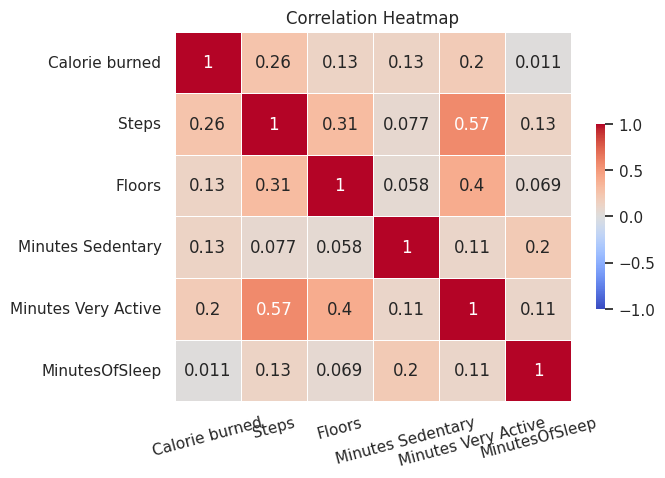

In [237]:
# easier to spot correlations
sns.heatmap(cor_fit, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.xticks(rotation=15)
plt.yticks(rotation=0)

plt.show()

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [238]:
# your code here
corrSorted = cor_fit['Steps'].sort_values(ascending=False).to_frame()
corrSorted

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [239]:
# your code here
timeGrades = pd.read_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Week 4/Day 19 - Thursday/[LAB 5] - Pivot Tables and Crosstabs/Time_Grades.csv")
timeGrades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

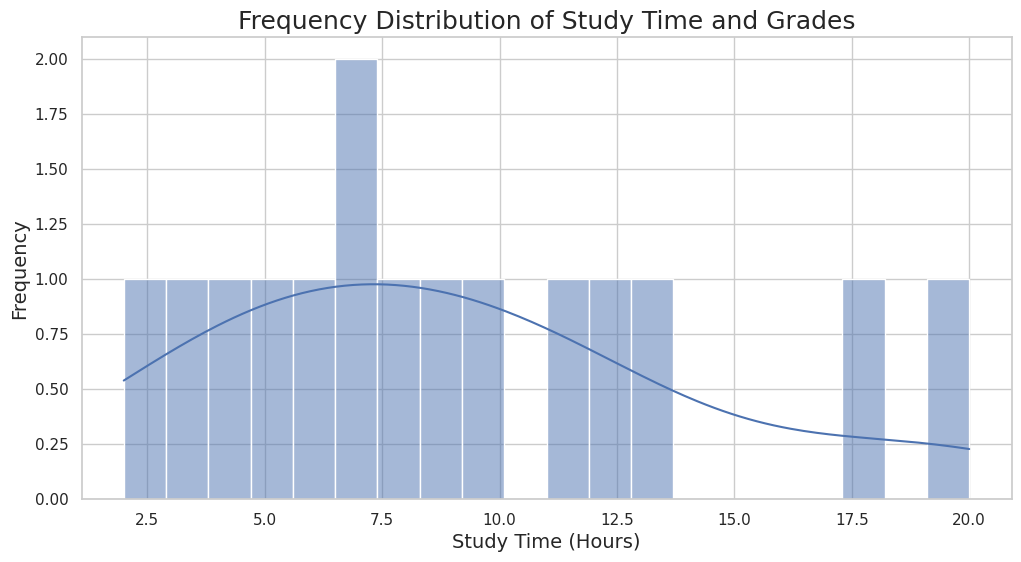

In [240]:
# your code here
sns.set_theme(style="whitegrid")
# sns.set_palette("husl")

# frequency distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=timeGrades, x="Study time", bins=20, kde=True)

# title and labels
plt.title("Frequency Distribution of Study Time and Grades", fontsize=18)
plt.xlabel("Study Time (Hours)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# visualize
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [241]:
# your code here
st = timeGrades["Study time"]
grade = timeGrades["Grade"]

# pearson
pearson_corr, pearson_p_value = pearsonr(st, grade)
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

# spearman
spearman_corr, spearman_p_value = spearmanr(st, grade)
print("\nSpearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)

Pearson correlation coefficient: 0.7980456073578858
Pearson p-value: 0.0003627635256342715

Spearman correlation coefficient: 0.819658753036942
Spearman p-value: 0.00018377469445788485


In [242]:
"""
your commments here
"""

print("""

[MNEMONIC] - PERSONAL MEMORY AID

PEARSON CORRELATION COEFFICIENT:
This measures the linear relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no linear relationship.

SPEARMAN CORRELATION COEFFICIENT:
This measures the monotonic relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no monotonic relationship.

P-VALUE:
A p-value less than 0.05 indicates that the correlation is statistically significant and unlikely to have occurred by chance.\n

""")

print("""

Based on the results:

1. PEARSON CORRELATION COEFFICIENt:
   The Pearson correlation coefficient of 0.7980456073578858 suggests a strong positive linear relationship between study time and grades.
   As study time increases, grades also tend to increase.

2. SPEARMAN CORRELATION COEFFICIENT:
   The Spearman correlation coefficient of 0.819658753036942 indicates a strong positive monotonic relationship between study time and grades.
   This means that as study time consistently increases or decreases, grades also consistently increase or decrease.

3. P-VALUES:
   Both the Pearson and Spearman p-values (0.0003627635256342715 and 0.00018377469445788485, respectively),
   are less than the typical significance level of 0.05.
   This indicates that the correlations are statistically significant and unlikely to have occurred by chance.

In conclusion,
there is a strong positive correlation between study time and grades based on both Pearson and Spearman correlation coefficients.
The results suggest that students who spend more time studying tend to have higher grades.

However, it's essential to remember that correlation does not imply causation.
While these results indicate an association between study time and grades,
further research would be needed to determine if there is a direct causal relationship between the two variables.

""")



[MNEMONIC] - PERSONAL MEMORY AID

PEARSON CORRELATION COEFFICIENT:
This measures the linear relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no linear relationship.

SPEARMAN CORRELATION COEFFICIENT:
This measures the monotonic relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no monotonic relationship.

P-VALUE:
A p-value less than 0.05 indicates that the correlation is statistically significant and unlikely to have occurred by chance.





Based on the results:

1. PEARSON CORRELATION COEFFICIENt:
   The Pearson correlation coefficient of 0.7980456073578858 suggests a strong positive linear relationship between study time and grades.
   As study time increases, grades also tend to increase.

2. SPEARMA

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

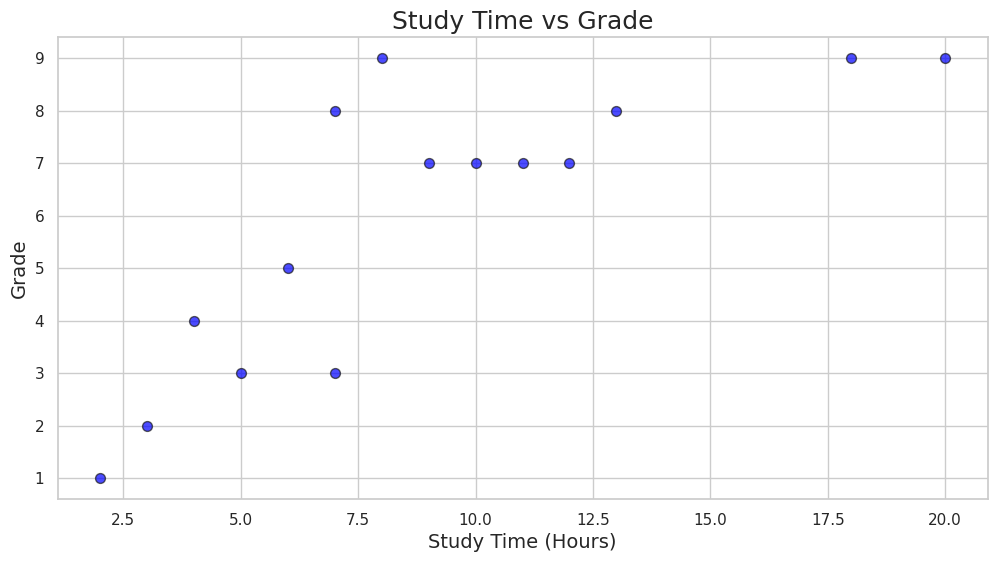

In [243]:
# your code here
plt.figure(figsize=(12, 6))
plt.scatter(st, grade, marker='o', s=50, c='blue', edgecolor='k', alpha=0.7)

# title and labels
plt.title("Study Time vs Grade", fontsize=18)
plt.xlabel("Study Time (Hours)", fontsize=14)
plt.ylabel("Grade", fontsize=14)

# plot
plt.show()

# correlation coefficient
# correlation = timeGrades.corr().iloc[0, 1]

In [244]:
"""
your commments here
"""

print("""

Based on the results:

The scatter plot shows an upward trend and the correlation coefficient is close to 1 (at 0.7 or higher),
indicating a strong positive relationship between study time and grades. As study time increases, so do the grades.

""")



Based on the results:

The scatter plot shows an upward trend and the correlation coefficient is close to 1 (at 0.7 or higher),
indicating a strong positive relationship between study time and grades. As study time increases, so do the grades.




#### Could you explain the difference between Pearson and Spearman correlations?

In [245]:
"""
your commments here
"""

print("""

PEARSON CORRELATION COEFFICIENT:
This measures the linear relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no linear relationship.

SPEARMAN CORRELATION COEFFICIENT:
This measures the monotonic relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no monotonic relationship.

""")



PEARSON CORRELATION COEFFICIENT:
This measures the linear relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no linear relationship.

SPEARMAN CORRELATION COEFFICIENT:
This measures the monotonic relationship between two variables.
A value close to 1 indicates a strong positive relationship,
a value close to -1 indicates a strong negative relationship,
and a value close to 0 indicates no monotonic relationship.




In [246]:
print("""

EXPLAIN AS IF A PERSON HAVE NEVER DONE MATHS

Imagine you have two sets of data that represent different things,
like the height and weight of people in a group.
You want to know if there's any relationship between these two sets of data.
This is where correlation comes into play.
There are two common types of correlation: Pearson and Spearman.

PEARSON CORRELATION:
    Think of this like measuring the "straightness" of the relationship between the two sets of data.
    It looks at how closely the data points follow a straight line.
    When you draw this line, it helps you predict one value based on the other.
    If the Pearson correlation is close to 1 or -1, the relationship is strong and straight.
    If it's close to 0, there's little or no relationship.
    A positive correlation (closer to 1) means that as one value increases, so does the other,
    while a negative correlation (closer to -1) means that as one value increases, the other decreases.

SPEARMAN CORRELATION:
    Instead of measuring the "straightness" like Pearson does,
    Spearman measures the "consistency" of the relationship.
    It doesn't care if the relationship is straight or curved.
    It just checks whether the two sets of data follow the same pattern or not.
    To do this, Spearman ranks the data points and compares their ranks.
    Like Pearson, Spearman correlation can be positive, negative, or close to 0,
    but it's less sensitive to extreme values or situations where the relationship isn't straight.

In summary, Pearson correlation measures the straightness of the relationship between two sets of data,
while Spearman correlation measures the consistency of the relationship, regardless of whether it's straight or curved.

""")



EXPLAIN AS IF A PERSON HAVE NEVER DONE MATHS

Imagine you have two sets of data that represent different things,
like the height and weight of people in a group.
You want to know if there's any relationship between these two sets of data.
This is where correlation comes into play.
There are two common types of correlation: Pearson and Spearman.

PEARSON CORRELATION:
    Think of this like measuring the "straightness" of the relationship between the two sets of data.
    It looks at how closely the data points follow a straight line.
    When you draw this line, it helps you predict one value based on the other.
    If the Pearson correlation is close to 1 or -1, the relationship is strong and straight.
    If it's close to 0, there's little or no relationship.
    A positive correlation (closer to 1) means that as one value increases, so does the other,
    while a negative correlation (closer to -1) means that as one value increases, the other decreases.

SPEARMAN CORRELATION:
    I

**NOTE TO SELF (for future reference): When to use Pearson and Spearman**

Deciding when to use Pearson or Spearman correlation depends on the nature of your data and the type of relationship you're interested in examining. Here's a guideline to help you decide which one to use:

1. **Use Pearson Correlation when:**
- Your data is continuous (e.g., height, weight, temperature) and follows a linear relationship.
- Both variables have a normal (bell-shaped) distribution.
- There are no significant outliers in your data that can skew the results.

2. **Use Spearman Correlation when:**
- Your data is non-linear or follows a monotonic relationship (i.e., consistently increasing or decreasing, but not necessarily at a constant rate).
- You have ordinal data (e.g., rankings, scores, or ratings) or continuous data that does not follow a normal distribution.
- There are outliers in your data that could impact Pearson correlation results.

In summary, use Pearson correlation when your data is continuous, follows a linear relationship, and is normally distributed. Use Spearman correlation when dealing with non-linear relationships, ordinal data, or when outliers could impact your results. Remember that both methods measure the strength and direction of the relationship between two variables, but they are sensitive to different aspects of the data.